In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

/home/jon/.local/lib/python3.6/site-packages/matplotlib/__init__.py:886: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))


## all features of each dataset

This is a table of all the columns in each dataset, there are a lot so it might be useful to see all of them in one table

In [4]:
datadict = pd.ExcelFile('../Simulacrum-data-dictionary.xlsx')
sheets = datadict.sheet_names[1:]
DF = pd.DataFrame()
for sheet in sheets:
    df = pd.read_excel(datadict,sheet)
    df[sheet] = df['Field name']
    DF = pd.concat([DF,df[sheet]], axis=1)

DF

ImportError: Install xlrd >= 0.9.0 for Excel support

# patient

In [6]:
av_patient = pd.read_csv('../simulacrum_release_v1.1.0/sim_av_patient.csv')
display(av_patient.head())

,PATIENTID,SEX,LINKNUMBER,ETHNICITY,DEATHCAUSECODE_1A,DEATHCAUSECODE_1B,DEATHCAUSECODE_1C,DEATHCAUSECODE_2,DEATHCAUSECODE_UNDERLYING,DEATHLOCATIONCODE,NEWVITALSTATUS,VITALSTATUSDATE
0,10000001,2,810000001,A,NaN,NaN,NaN,NaN,NaN,NaN,A,2017-01-17
1,10000002,2,810000002,Z,NaN,NaN,NaN,NaN,NaN,NaN,A,2017-01-14
2,10000003,1,810000003,A,NaN,NaN,NaN,NaN,NaN,NaN,A,2017-01-17
3,10000004,1,810000004,A,NaN,NaN,NaN,NaN,NaN,NaN,A,2017-01-13
4,10000005,2,810000005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A,2017-01-16


frequency of each death cause:

[Text(0, 0, 'deathcause')]

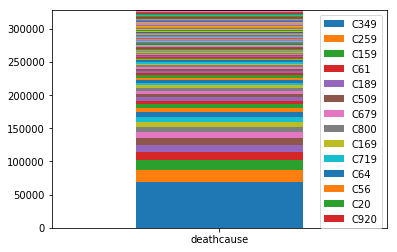

In [7]:
vc = av_patient['DEATHCAUSECODE_UNDERLYING'].value_counts()
ax = pd.DataFrame(vc).T.plot.bar(stacked=True)
ax.legend(vc.keys()[0:14]);
ax.set_xticklabels(labels=['deathcause'],rotation=0)

# tumour

In [9]:
av_tumour = pd.read_csv('../simulacrum_release_v1.1.0/sim_av_tumour.csv',low_memory=False)
display(av_tumour.head())
print(av_tumour.shape)

,TUMOURID,PATIENTID,DIAGNOSISDATEBEST,SITE_ICD10_O2,SITE_ICD10_O2_3CHAR,MORPH_ICD10_O2,BEHAVIOUR_ICD10_O2,T_BEST,N_BEST,M_BEST,...,PERFORMANCESTATUS,CNS,ACE27,GLEASON_PRIMARY,GLEASON_SECONDARY,GLEASON_TERTIARY,GLEASON_COMBINED,DATE_FIRST_SURGERY,LATERALITY,QUINTILE_2015
0,10000001,10000001,2015-11-06,C443,C44,8090,3,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015-11-06,L,3
1,10000002,10000002,2015-10-06,C449,C44,8090,3,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015-10-06,8,2
2,10000003,10000003,2013-01-30,C449,C44,8090,3,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8,1 - least deprived
3,10000004,10000004,2015-09-15,C449,C44,8090,3,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8,2
4,10000005,10000005,2014-11-01,C449,C44,8090,3,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014-11-01,8,2


(1402817, 34)


Making some bar plots of the tumour features, colour coded with the tumour site:

In [10]:
tumour_features = av_tumour[['SITE_ICD10_O2_3CHAR', 'BEHAVIOUR_ICD10_O2', 'T_BEST',
                            'N_BEST', 'M_BEST', 'STAGE_BEST', 'STAGE_BEST_SYSTEM', 'GRADE', 'AGE',
                            'CANCERCAREPLANINTENT', 'PERFORMANCESTATUS', 'ACE27','LATERALITY']]
vc = av_tumour['SITE_ICD10_O2_3CHAR'].value_counts()
vc[:20] #top20tumoursites

C44    350130
C50    133907
C61    119347
C34    102350
D06     76678
C18     65825
C43     38155
C20     27163
C64     26195
D09     25193
C67     24643
C54     21849
C25     21344
C15     20996
D05     19777
C83     18264
D03     17123
C56     16939
C16     15298
C90     13504
Name: SITE_ICD10_O2_3CHAR, dtype: int64

The colours in these plots are the site of the tumour, the legend only shows the top 20 sites

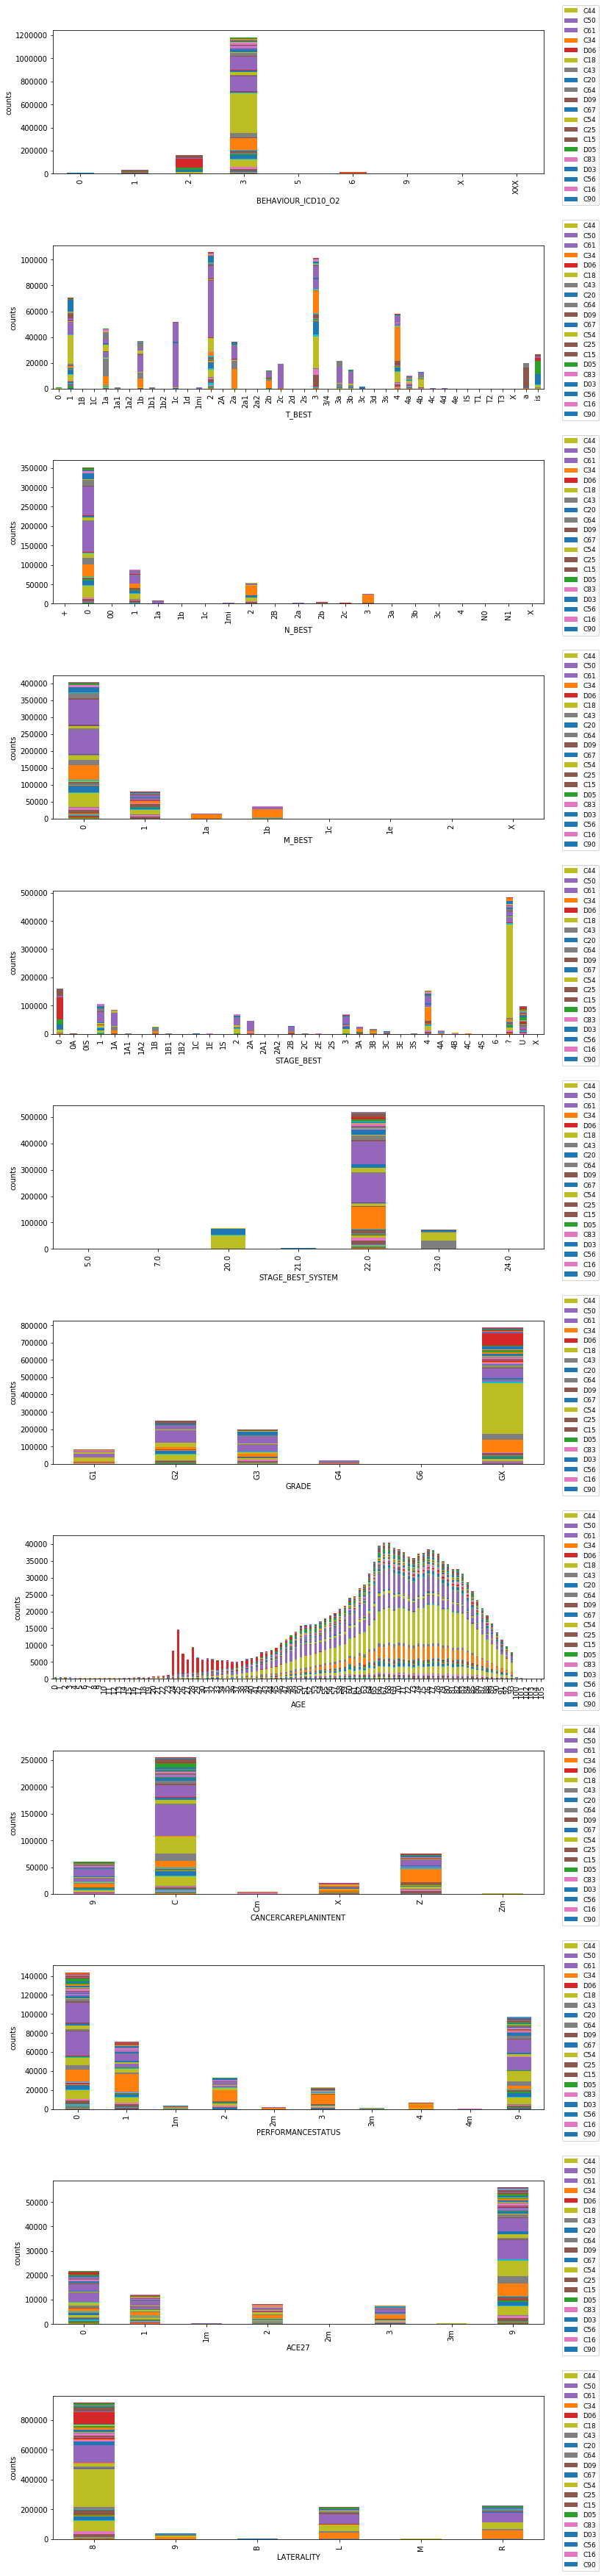

In [11]:
tf_keys = list(tumour_features.keys())
tf_keys.remove('SITE_ICD10_O2_3CHAR')
fig, axes = plt.subplots(nrows=len(tf_keys), ncols=1, figsize=(10,4*len(tf_keys)))
fig.tight_layout()
for i,col in enumerate(tf_keys):
    
    feature = tumour_features[['SITE_ICD10_O2_3CHAR',col]] \
                        .groupby([col, 'SITE_ICD10_O2_3CHAR']) \
                        .agg({'SITE_ICD10_O2_3CHAR':'size'}) \
                        .rename(columns={'SITE_ICD10_O2_3CHAR':'site count'}) \
                        .reset_index()
    feature = feature.pivot(index=col, columns='SITE_ICD10_O2_3CHAR')['site count']
    ax = feature.plot(kind='bar', stacked=True, ax=axes[i])
    handles, labels = ax.get_legend_handles_labels()
    top20index = [labels.index(v) for v in vc[:20].keys()]
    top20handles = [handles[i] for i in top20index]
    ax.legend(top20handles, vc[:20].keys(),loc='best', bbox_to_anchor=(0.62, 0.7, 0.5, 0.5),prop={'size':9})
    ax.set_ylabel('counts')
plt.subplots_adjust(hspace=0.5)

# merging

av_tumour and av_patient

In [54]:
tumour_patient = pd.merge(av_tumour,av_patient,on='PATIENTID')
print(av_tumour.shape,av_patient.shape,tumour_patient.shape) 

(1402817, 34) (1322100, 12) (1402817, 45)


create column with days between date of vital status taken and date of diagnosis

In [55]:
from datetime import date

diagnosis_dates = pd.to_datetime(tumour_patient['DIAGNOSISDATEBEST'])
vitalstat_dates = pd.to_datetime(tumour_patient['VITALSTATUSDATE'])

tumour_patient['VITAL - DIAGNOSIS (days)'] = vitalstat_dates - diagnosis_dates
tumour_patient['VITAL - DIAGNOSIS (days)'] = [i.days for i in tumour_patient['VITAL - DIAGNOSIS (days)']]
tumour_patient = tumour_patient[tumour_patient['VITAL - DIAGNOSIS (days)'] >= 0] #some have vital status in 1900

print("stats for days being alive")
tumour_patient['VITAL - DIAGNOSIS (days)'].describe()

stats for days being alive


count    1.402784e+06
mean     7.674820e+02
std      4.079234e+02
min      0.000000e+00
25%      4.660000e+02
50%      7.690000e+02
75%      1.105000e+03
max      1.484000e+03
Name: VITAL - DIAGNOSIS (days), dtype: float64

plots of mean days alive from patients that died

In [56]:
dead_patient = tumour_patient[tumour_patient['NEWVITALSTATUS'] == 'D']

time_behav = dead_patient[dead_patient['BEHAVIOUR_ICD10_O2'] != 'XXX'].dropna(subset=['BEHAVIOUR_ICD10_O2'])
time_behav['BEHAVIOUR_ICD10_O2'] = time_behav['BEHAVIOUR_ICD10_O2'].astype(int)
time_behav['VITAL - DIAGNOSIS (days)'] = time_behav['VITAL - DIAGNOSIS (days)'].astype(float)
mean_days_alive = time_behav[['SITE_ICD10_O2_3CHAR','BEHAVIOUR_ICD10_O2' , 'VITAL - DIAGNOSIS (days)']] \
                    .groupby(['SITE_ICD10_O2_3CHAR','BEHAVIOUR_ICD10_O2']) \
                    .agg({'SITE_ICD10_O2_3CHAR':'size', 'VITAL - DIAGNOSIS (days)':'mean'}) \
                    .rename(columns={'SITE_ICD10_O2_3CHAR':'site count','VITAL - DIAGNOSIS (days)':'mean days alive'}) \
                    .reset_index()

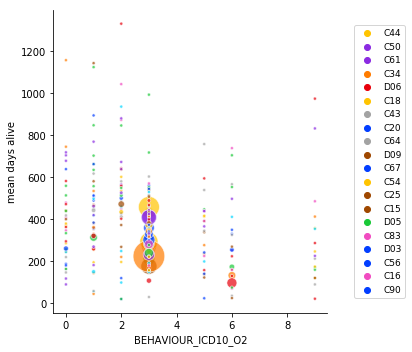

In [158]:
p = sns.relplot(x="BEHAVIOUR_ICD10_O2", y="mean days alive", hue="SITE_ICD10_O2_3CHAR", size="site count",
            sizes=(10, 1000), alpha=.7, palette="bright",
            height=5, data=mean_days_alive)
handles, labels = p.ax.get_legend_handles_labels()
top20index = [labels.index(v) for v in vc[:20].keys()]
top20handles = [handles[i] for i in top20index]
p.ax.legend(top20handles, vc[:20].keys(),loc='right', bbox_to_anchor=(0.8, 0.25, 0.5, 0.5),prop={'size':9})
p._legend.remove()

Different colors mean different tumour sites

The sizes of the blobs represent the number of people who have that tumour

There isn't a clear correlation between the time alive and the behaviour of the tumour(how bad the tumour is)

# sact_cycle

In [27]:
sact_cycle = pd.read_csv('simulacrum_release_v1.1.0/sim_sact_cycle.csv')
sact_cycle.head()

/Users/jeremyocampo/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,MERGED_CYCLE_ID,MERGED_REGIMEN_ID,CYCLE_NUMBER,START_DATE_OF_CYCLE,OPCS_PROCUREMENT_CODE,PERF_STATUS_START_OF_CYCLE,MERGED_PATIENT_ID,MERGED_TUMOUR_ID
0,10000001,10000001,4,2015-06-07,NaN,NaN,10000235,10000001
1,10000002,10000002,2,2016-08-07,NaN,00,10000315,10000002
2,10000003,10000003,3,NaN,X715,NaN,10000337,10000003
3,10000004,10000004,2,2015-03-23,X712,0,10000480,10000004
4,10000005,10000005,1,2013-03-11,X711,NaN,10000533,10000005


In [28]:
print('shape ',sact_cycle.shape)

for col in list(sact_cycle.columns):
    print(col," ",sact_cycle[col].unique()[0:6])

shape  (1462099, 8)
MERGED_CYCLE_ID   [10000001 10000002 10000003 10000004 10000005 10000006]
MERGED_REGIMEN_ID   [10000001 10000002 10000003 10000004 10000005 10000006]
CYCLE_NUMBER   [ 4  2  3  1  5 11]
START_DATE_OF_CYCLE   ['2015-06-07' '2016-08-07' nan '2015-03-23' '2013-03-11' '2012-06-29']
OPCS_PROCUREMENT_CODE   [nan 'X715' 'X712' 'X711' 'X713' 'X702']
PERF_STATUS_START_OF_CYCLE   [nan '00' '0' '1' '-1' '2']
MERGED_PATIENT_ID   [10000235 10000315 10000337 10000480 10000533 10000697]
MERGED_TUMOUR_ID   [10000001 10000002 10000003 10000004 10000005 10000006]


# drug_detail

In [30]:
drug_detail = pd.read_csv('simulacrum_release_v1.1.0/sim_sact_drug_detail.csv')
drug_detail.head()

,MERGED_DRUG_DETAIL_ID,MERGED_CYCLE_ID,ORG_CODE_OF_DRUG_PROVIDER,ACTUAL_DOSE_PER_ADMINISTRATION,OPCS_DELIVERY_CODE,ADMINISTRATION_ROUTE,ADMINISTRATION_DATE,DRUG_GROUP,MERGED_PATIENT_ID,MERGED_TUMOUR_ID,MERGED_REGIMEN_ID
0,10000001,10000001,EKD02,10.0,NaN,1.0,2015-06-07,STEROID,10000235,10000001,10000001
1,10000002,10000002,EGU02,30.0,NaN,2.0,NaN,NOT CHEMO,10000315,10000002,10000002
2,10000003,10000003,EGU05,1000.0,NaN,1.0,NaN,RITUXIMAB,10000337,10000003,10000003
3,10000004,10000004,EXO,8.0,X723,2.0,2015-03-23,NOT CHEMO,10000480,10000004,10000004
4,10000005,10000005,ETD02,1000.0,NaN,2.0,2013-03-11,NOT CHEMO,10000533,10000005,10000005


In [31]:
print('shape ',drug_detail.shape)

for col in list(drug_detail.columns):
    print(col," ",drug_detail[col].unique()[0:6])

shape  (3544584, 11)
MERGED_DRUG_DETAIL_ID   [10000001 10000002 10000003 10000004 10000005 10000006]
MERGED_CYCLE_ID   [10000001 10000002 10000003 10000004 10000005 10000007]
ORG_CODE_OF_DRUG_PROVIDER   ['EKD02' 'EGU02' 'EGU05' 'EXO' 'ETD02' 'ETA42']
ACTUAL_DOSE_PER_ADMINISTRATION   [  10.   30. 1000.    8.  300.  100.]
OPCS_DELIVERY_CODE   [nan 'X723' 'X731' 'x723' 'X729' 'x721']
ADMINISTRATION_ROUTE   [ 1.  2.  5. nan 99.  4.]
ADMINISTRATION_DATE   ['2015-06-07' nan '2015-03-23' '2013-03-11' '2014-07-25' '2012-12-07']
DRUG_GROUP   ['STEROID' 'NOT CHEMO' 'RITUXIMAB' 'DOCETAXEL' 'PACLITAXEL' 'CARBOPLATIN']
MERGED_PATIENT_ID   [10000235 10000315 10000337 10000480 10000533 10000697]
MERGED_TUMOUR_ID   [10000001 10000002 10000003 10000004 10000005 10000006]
MERGED_REGIMEN_ID   [10000001 10000002 10000003 10000004 10000005 10000007]


# outcome

In [33]:
outcome = pd.read_csv('simulacrum_release_v1.1.0/sim_sact_outcome.csv')
outcome.head()

,MERGED_OUTCOME_ID,MERGED_REGIMEN_ID,DATE_OF_FINAL_TREATMENT,REGIMEN_MOD_DOSE_REDUCTION,REGIMEN_MOD_TIME_DELAY,REGIMEN_MOD_STOPPED_EARLY,REGIMEN_OUTCOME_SUMMARY,MERGED_PATIENT_ID,MERGED_TUMOUR_ID
0,10000001,10000003,2014-01-09,N,N,N,NaN,10000337,10000003
1,10000002,10000005,NaN,Y,Y,N,NaN,10000533,10000005
2,10000003,10000006,NaN,N,Y,N,NaN,10000697,10000006
3,10000004,10000007,NaN,Y,NaN,N,NaN,10000697,10000006
4,10000005,10000008,2012-12-07,NaN,NaN,NaN,NaN,10000773,10009036


In [34]:
print('shape ',outcome.shape)

for col in list(outcome.columns):
    print(col," ",outcome[col].unique()[0:6])

shape  (351668, 9)
MERGED_OUTCOME_ID   [10000001 10000002 10000003 10000004 10000005 10000006]
MERGED_REGIMEN_ID   [10000003 10000005 10000006 10000007 10000008 10000009]
DATE_OF_FINAL_TREATMENT   ['2014-01-09' nan '2012-12-07' '2013-12-10' '2016-08-08' '2014-07-23']
REGIMEN_MOD_DOSE_REDUCTION   ['N' 'Y' nan '0' 'n']
REGIMEN_MOD_TIME_DELAY   ['N' 'Y' nan '3' '0' '5']
REGIMEN_MOD_STOPPED_EARLY   ['N' nan 'Y' '0' '4' 'y']
REGIMEN_OUTCOME_SUMMARY   [nan '0' '5' '4' '3' 'N']
MERGED_PATIENT_ID   [10000337 10000533 10000697 10000773 10000966 10000997]
MERGED_TUMOUR_ID   [10000003 10000005 10000006 10009036 10000007 10000008]


# sact_patient

In [27]:
sact_patient = pd.read_csv('simulacrum_release_v1.1.0/sim_sact_patient.csv')
sact_patient.head()

,MERGED_PATIENT_ID,LINK_NUMBER
0,10000087,810000087
1,10000235,810000235
2,10000283,810000283
3,10000315,810000315
4,10000337,810000337


In [36]:
print('shape ',sact_patient.shape)

for col in list(sact_patient.columns):
    print(col," ",sact_patient[col].unique()[0:6])

shape  (245938, 2)
MERGED_PATIENT_ID   [10000087 10000235 10000283 10000315 10000337 10000365]
LINK_NUMBER   [810000087 810000235 810000283 810000315 810000337 810000365]


# sact_regimen

https://stackoverflow.com/questions/18171739/unicodedecodeerror-when-reading-csv-file-in-pandas-with-python - loading sim_sact_regimen

In [53]:
sact_regimen = pd.read_csv('simulacrum_release_v1.1.0/sim_sact_regimen.csv',encoding="ISO-8859-1")
sact_regimen.head()

,MERGED_REGIMEN_ID,MERGED_TUMOUR_ID,HEIGHT_AT_START_OF_REGIMEN,WEIGHT_AT_START_OF_REGIMEN,INTENT_OF_TREATMENT,DATE_DECISION_TO_TREAT,START_DATE_OF_REGIMEN,MAPPED_REGIMEN,CLINICAL_TRIAL,CHEMO_RADIATION,MERGED_PATIENT_ID,BENCHMARK_GROUP
0,10000001,10000001,-1.0,NaN,N,2015-03-08,2015-03-08,DEGARELIX,NaN,N,10000235,HORMONES
1,10000002,10000002,NaN,NaN,P,2016-07-09,2016-07-10,BICALUTAMIDE + GOSERELIN,NaN,N,10000315,HORMONES
2,10000003,10000003,NaN,NaN,P,2014-01-09,2014-01-09,EXEMESTANE,02,N,10000337,HORMONES
3,10000004,10000004,NaN,NaN,NaN,2015-03-17,2015-03-23,Rituximab,N,NaN,10000480,RITUXIMAB
4,10000005,10000005,0.0,NaN,C,2012-12-30,2013-03-11,Hydroxycarbamide,N,N,10000533,HYDROXYCARBAMIDE


In [40]:
range(9)[1]

1

# sact_tumour

In [37]:
sact_tumour = pd.read_csv('simulacrum_release_v1.1.0/sim_sact_tumour.csv')
sact_regimen = pd.read_csv('simulacrum_release_v1.1.0/sim_sact_regimen.csv',encoding="ISO-8859-1")
sact_patient = pd.read_csv('simulacrum_release_v1.1.0/sim_sact_patient.csv')
sact_tumour.head()

,MERGED_TUMOUR_ID,MERGED_PATIENT_ID,CONSULTANT_SPECIALITY_CODE,PRIMARY_DIAGNOSIS,MORPHOLOGY_CLEAN
0,10000001,10000235,101.0,C61,81403.0
1,10000002,10000315,101.0,C679,81403.0
2,10000003,10000337,100.0,C500,NaN
3,10000004,10000480,303.0,C829,NaN
4,10000005,10000533,823.0,D473,NaN


In [38]:
print('shape ',sact_tumour.shape)

for col in list(sact_tumour.columns):
    print(col," ",sact_tumour[col].unique()[0:6])

shape  (299727, 5)
MERGED_TUMOUR_ID   [10000001 10000002 10000003 10000004 10000005 10000006]
MERGED_PATIENT_ID   [10000235 10000315 10000337 10000480 10000533 10000697]
CONSULTANT_SPECIALITY_CODE   [101. 100. 303. 823.   0. 800.]
PRIMARY_DIAGNOSIS   ['C61' 'C679' 'C500' 'C829' 'D473' 'C833']
MORPHOLOGY_CLEAN   [81403.    nan 96803. 99623. 85003. 99503.]
